In [1]:
!pip install deepface

In [2]:
from deepface import DeepFace

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

# you can use below codes for webcan using


In [ ]:
cam = cv.VideoCapture(0)

cv.namedWindow("Camera")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv.imshow("Camera", frame)

    k = cv.waitKey(1)
    if k%256 == 27:
        print("closing...")
        break
    elif k%256 == 32:
        img_input = "opencv_frame_{}.jpg".format(img_counter)
        cv.imwrite(img_input, frame)
        print("{} Saved!".format(img_input))
        img_counter += 1

cam.release()

cv.destroyAllWindows()

In [4]:
img_path = "woman.jpg"
img_input = cv.imread(img_path)

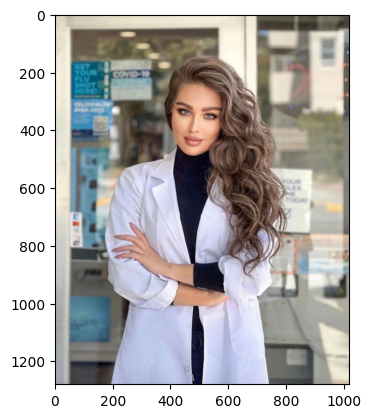

In [5]:
plt.imshow(img_input[:,:,::-1])

In [6]:
objs = DeepFace.analyze(img_input,  actions = ['gender'])

23-12-16 18:45:17 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:04<00:00, 110MB/s]


In [7]:
for obj in objs :
  print("gender is : "+obj["dominant_gender"])

gender is : Woman


In [8]:
print("__________compare yourself with below race beauty standards___________ ")
print("1-Asian")
print("2-Black/African Descent")
print("3-Indian")
print("4-Latino/Hispanic")
print("5-Middle eastern")
print("6-White/Caucasian")
print('_______________________________________________________________________')

__________compare yourself with below race beauty standards___________ 
1-Asian
2-Black/African Descent
3-Indian
4-Latino/Hispanic
5-Middle eastern
6-White/Caucasian
_______________________________________________________________________


In [9]:
num_imput = int(input("Select number of Race : "))-1

Select number of Race : 6


In [10]:
image_list_f = ["asian f1.jpg","black f1.jpg","indian f1.jpg","latin f1.jpg","middle f1.jpg","white f1.jpg"]
image_list_m = ["asian m1.jpg","black m1.jpg","indian m1.jpg","latin m1.jpg","middle m1.jpg","white m1.jpg"]

In [11]:
def select_m_f ():
  if obj["dominant_gender"] == 'Man' :
     img_model = cv.imread(image_list_m[num_imput])
  else :
     img_model = cv.imread(image_list_f[num_imput])
  return img_model

In [12]:
selector = select_m_f()

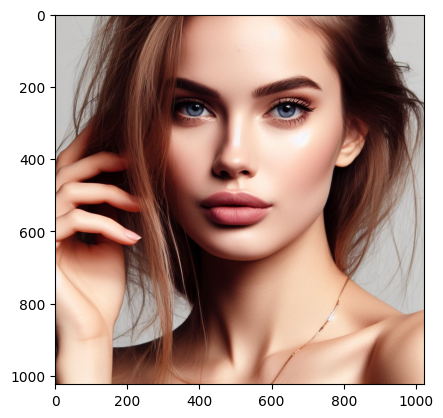

In [13]:
plt.imshow(selector[:,:,::-1])

In [14]:
result = DeepFace.verify(img_input, selector)


23-12-16 18:49:37 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 240MB/s]


In [29]:
result

{'verified': True,
 'distance': 0.298732319727656,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 376, 'y': 259, 'w': 227, 'h': 227},
  'img2': {'x': 218, 'y': 37, 'w': 594, 'h': 594}},
 'time': 7.84}

In [46]:
result_face = 100*result['distance']

In [48]:
def final(result_face):
  if 0 <= result_face < 20 :
    print('\U0001F60D'+'your face have high beauty standards in this region'+'\U0001F60D')
  elif 20 <= result_face < 50 :
    print('your face have medium beauty standards in this region'+'\U0001F603')
  elif 50 <= result_face < 80 :
    print('your face have low beauty standards in this region'+'\U0001F605')
  else :
    print('your face never have beauty standards in this region'+'\U0001F601')

In [49]:
final(result_face)

your face have medium beauty standards in this region😃
